---
# **PREDICTING FAIR APARTMENT PRICES IN DAEGU USING MACHINE LEARNING**
---

---
## **Business Understanding**
---

### **Context**

Apartemen merupakan salah satu solusi utama untuk memenuhi kebutuhan hunian di tengah keterbatasan lahan dan padatnya aktivitas di kawasan urban, termasuk kota Daegu. Dengan berkembangnya aktivitas bisnis dan meningkatnya permintaan tempat tinggal di kota besar, harga apartemen menjadi topik yang sangat penting untuk dianalisis. Harga apartemen dapat dipengaruhi oleh berbagai faktor, baik internal seperti ukuran unit dan fasilitas yang dimiliki, maupun eksternal seperti jarak ke transportasi umum atau keberadaan fasilitas publik di sekitarnya.

Biasanya, individu atau perusahaan menawarkan unit apartemen untuk dijual melalui berbagai platform. Penentuan harga jual sepenuhnya berada di tangan pemilik unit. Namun, dalam praktiknya, hal ini dapat menjadi tantangan: harga yang terlalu tinggi membuat unit sulit terjual, sementara harga yang terlalu rendah mengurangi potensi keuntungan. Oleh karena itu, penting untuk membantu pemilik unit dalam menentukan harga yang sesuai dengan kondisi pasar dan fitur yang dimiliki apartemen tersebut.

### **Problem Statement**

Salah satu tantangan terbesar dalam industri properti, khususnya pasar apartemen, adalah membantu pemilik apartemen untuk menetapkan harga jual yang wajar dan kompetitif. Penetapan harga secara manual, berdasarkan perkiraan pribadi atau perbandingan terbatas dengan properti sekitar, berisiko menimbulkan kesalahan yang dapat merugikan pemilik secara finansial.

**Dengan banyaknya unit apartemen yang dipasarkan, penting bagi pemilik untuk memiliki referensi harga yang objektif dan akurat berdasarkan fitur unit dan lingkungannya.**

### **Goals**

Berdasarkan permasalahan tersebut, dibutuhkan sebuah tool berbasis machine learning yang dapat **memprediksi harga jual yang wajar untuk unit apartemen baru.** Model ini akan memperhitungkan perbedaan berbagai fitur internal dan eksternal, seperti ukuran, tipe apartemen, jarak ke transportasi publik, dan jumlah fasilitas sekitar, untuk menghasilkan estimasi harga yang kompetitif.

Bagi penjual apartemen, model prediksi ini akan membantu mereka menentukan harga awal yang realistis, sehingga mempercepat proses penjualan dan memaksimalkan potensi keuntungan. Secara luas, model ini juga bisa dimanfaatkan oleh pengembang properti dan agen real estate untuk menentukan strategi harga.

### **Analytic Approach**

Pendekatan yang akan dilakukan dimulai dari eksplorasi dan analisis data historis penjualan apartemen di kota Daegu untuk memahami pola hubungan antara fitur-fitur apartemen dan harga jualnya. Kemudian akan dibangun model regresi prediktif menggunakan algoritma **XGBoost**, yang dikenal memiliki performa tinggi pada data tabular dan mampu menangani fitur non-linear.

Model ini akan dilatih untuk mempelajari hubungan kompleks antar variabel dan menghasilkan prediksi harga yang akurat. Beberapa model alternatif (baseline) seperti regresi linier atau random forest juga dapat digunakan sebagai pembanding performa.

### **Metric Evaluation**

Untuk mengevaluasi performa model, akan digunakan metrik-metrik regresi sebagai berikut:

- **RMSE (Root Mean Squared Error)** – mengukur rata-rata akar kuadrat dari error prediksi, memberikan penalti lebih besar untuk error besar.

- **MAE (Mean Absolute Error)** – rata-rata selisih absolut antara nilai aktual dan prediksi, mudah diinterpretasikan.

- **MAPE (Mean Absolute Percentage Error)** – mengukur rata-rata persentase error prediksi.

- **R-squared (R²)** – mengukur seberapa baik model menjelaskan variasi dalam data.

Semakin kecil nilai RMSE, MAE, dan MAPE yang diperoleh, maka semakin baik model dalam memprediksi harga. Sementara nilai R-squared yang mendekati 1 menunjukkan bahwa model mampu menangkap sebagian besar variasi harga berdasarkan fitur yang diberikan.

---
## **Data Understanding**
---

- Dataset ini berisi data penjualan apartemen di kota Daegu, Korea Selatan.
- Setiap baris merepresentasikan satu unit apartemen yang ditawarkan untuk dijual oleh pemilik atau perusahaan pengembang.
- Dataset berisi berbagai informasi internal (seperti ukuran dan fasilitas) serta eksternal (seperti jarak ke subway atau fasilitas publik di sekitar).

### **Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe lorong apartemen (misalnya terraced, mixed) |
| TimeToSubway | Object | Estimasi waktu tempuh ke stasiun subway terdekat (kategori: 0-5 min, 5-10 min, dst) |
| SubwayStation | Object | Nama stasiun subway terdekat |
| N_FacilitiesNearBy(ETC) | Float | Jumlah fasilitas umum lainnya (non-spesifik) di sekitar apartemen |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah kantor pemerintahan di sekitar apartemen |
| N_SchoolNearBy(University) | Float | Jumlah universitas terdekat |
| N_Parkinglot(Basement) | Float | Jumlah slot parkir basement yang tersedia |
| YearBuilt | Integer | Tahun bangunan apartemen dibangun |
| N_FacilitiesInApt | Integer | Jumlah fasilitas internal di dalam apartemen (misalnya gym, lift, dll) |
| Size(sqf) | Integer | Luas unit apartemen dalam satuan square feet |
| SalePrice | Integer | Harga jual unit apartemen (dalam Won) – Target variabel |

<br>

In [110]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [111]:
# Load dataset
df = pd.read_csv("data_daegu_apartment.csv")
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [112]:
# Data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB
None
Hallw

### **Exploratory Data Analysis**

1. **Distribusi Harga Apartemen**

Text(0.5, 1.0, 'Sale Price Distribution')

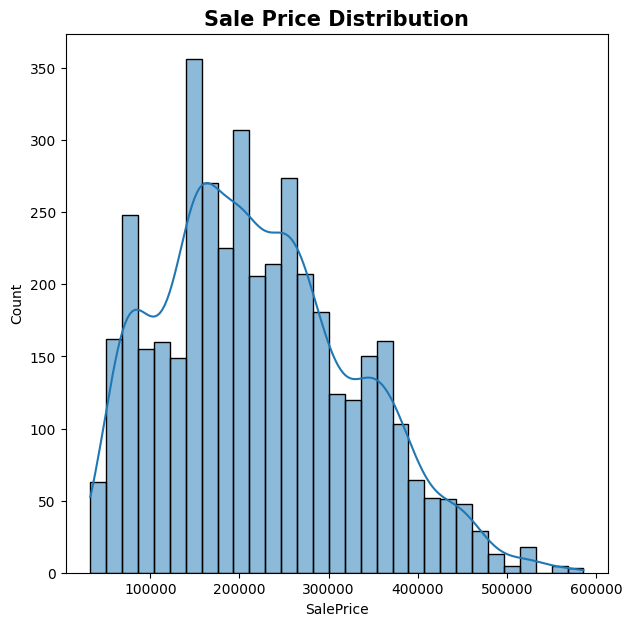

In [113]:
plt.figure(figsize=(7, 7))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution', fontsize=15, weight='bold')

Distribusi harga apartemen memiliki bentuk right-skewed (condong ke kanan) dengan puncak sekitar 150.000–250.000 Won, dan ekor panjang ke arah harga tinggi.

2. **Distribusi Ukuran Apartemen**

Text(0.5, 1.0, 'Apartment Size Distribution')

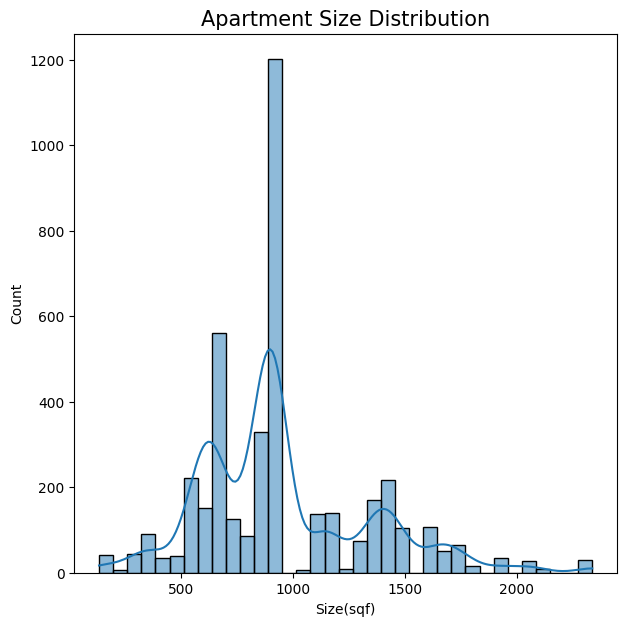

In [114]:
plt.figure(figsize=(7, 7))
sns.histplot(df['Size(sqf)'], kde=True)
plt.title('Apartment Size Distribution', fontsize=15)

Distribusi ukuran apartemen tidak normal dan menunjukkan puncak tajam sekitar 1.000 sqft, dengan beberapa klaster di bawah dan di atas 1.000 sqft, Hal ini menandakan kelompok ukuran unit standar.

3. **Korelasi antar Fitur Numerik**

Text(0.5, 1.0, 'Correlation Matrix')

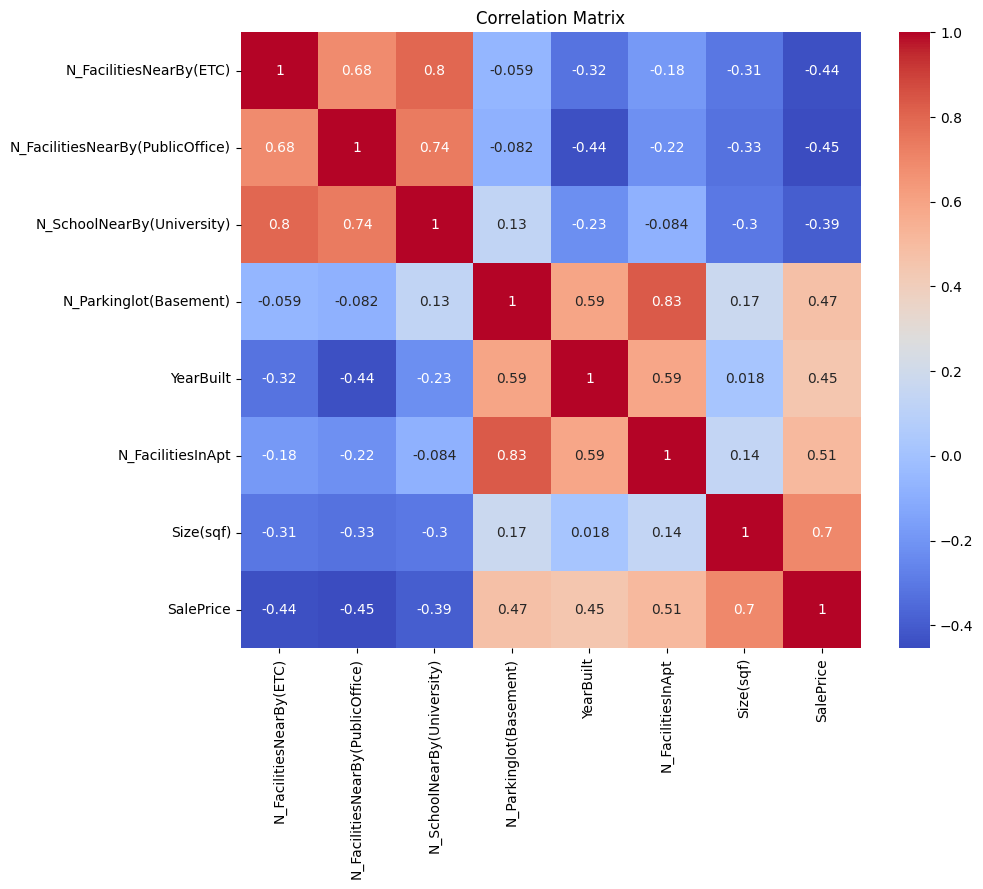

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Size(sqf) memiliki korelasi tertinggi dengan SalePrice (0.70), diikuti oleh N_FacilitiesInApt (0.51), N_Parkinglot(Basement) (0.47), dan YearBuilt (0.45). Sebaliknya, fasilitas di sekitar justru berkorelasi negatif terhadap harga.

4. **Boxplot Harga Berdasarkan Hallway Type**

Text(0.5, 1.0, 'Sale Price per Hallway Type')

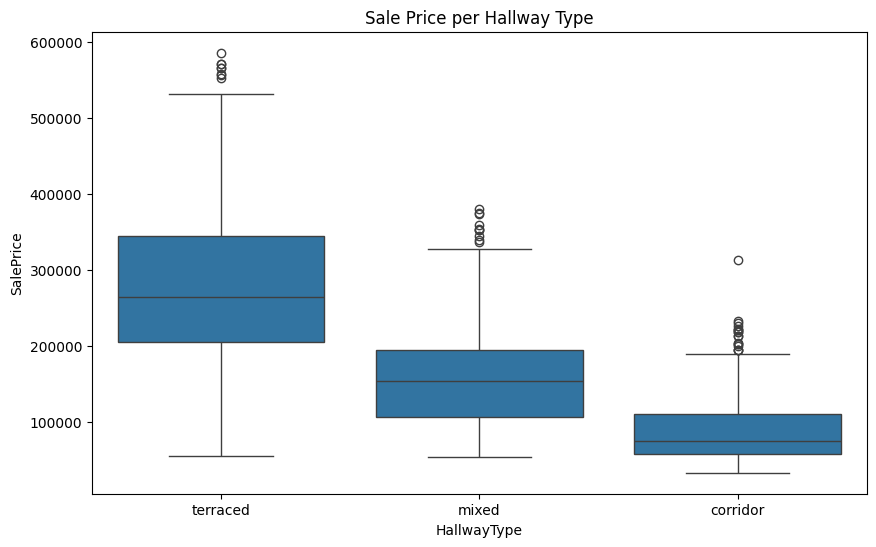

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(x='HallwayType', y='SalePrice', data=df)
plt.title('Sale Price per Hallway Type')

Apartemen dengan terraced hallway secara konsisten memiliki harga median tertinggi, diikuti oleh mixed, lalu corridor, dan terdapat banyak outlier harga tinggi di ketiga kategori, tapi dominan di terraced.

5. **Grouped Median Price per SubwayStation**

<Axes: title={'center': 'Median Sale Price per Subway Station'}, xlabel='SubwayStation'>

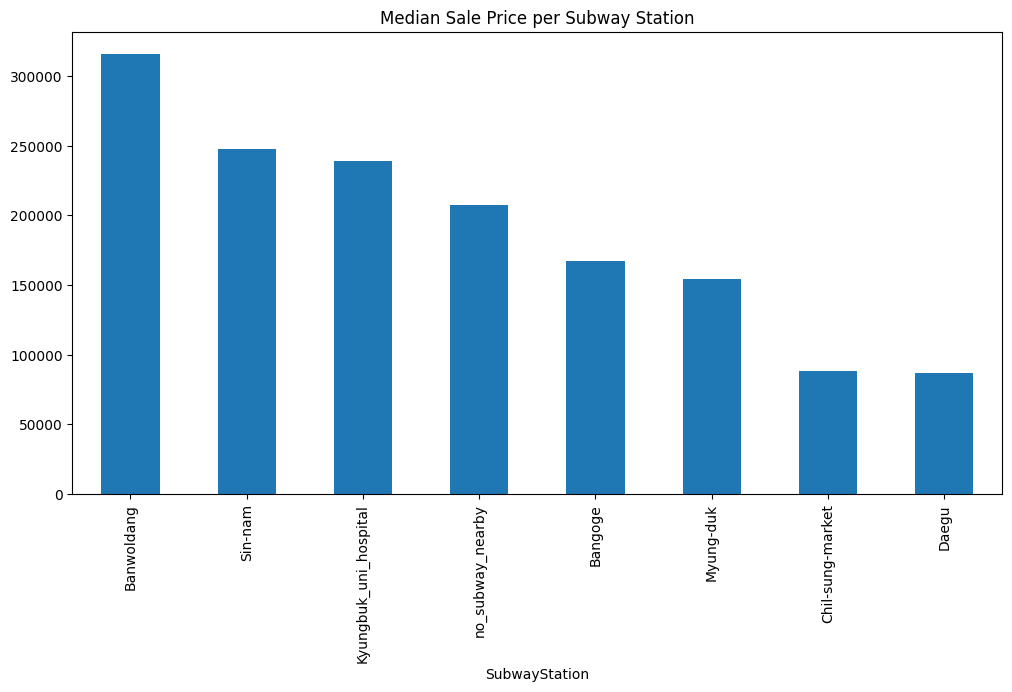

In [117]:
median_price_by_station = df.groupby('SubwayStation')['SalePrice'].median().sort_values(ascending=False)
median_price_by_station.plot(kind='bar', figsize=(12, 6), title='Median Sale Price per Subway Station')

Apartemen dekat Banwoldang memiliki harga median tertinggi, diikuti oleh Sin-nam dan Kyungbuk uni hospital. Akses ke subway secara umum tampaknya berkontribusi positif terhadap harga, kecuali kategori no_subway_nearby yang cukup tinggi. Hal ini kemungkinan disebabkan karena faktor lain seperti lokasi elite atau fasilitas internal.

6. **Perbandingan Sale Price dengan Building Age**

Text(0.5, 1.0, 'Sale Price vs Building Age')

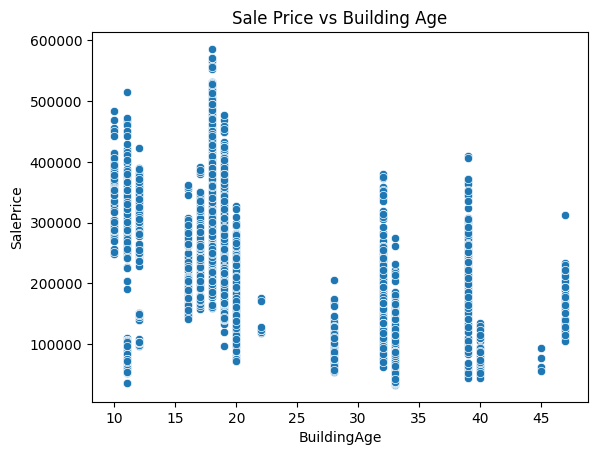

In [118]:
df['BuildingAge'] = 2025 - df['YearBuilt']
sns.scatterplot(x='BuildingAge', y='SalePrice', data=df)
plt.title('Sale Price vs Building Age')

Apartemen dengan usia bangunan sekitar 10–20 tahun cenderung memiliki harga jual yang lebih tinggi dan bervariasi. Sementara itu, Apartemen dengan usia bangunan lebih dari 25 tahun memiliki harga yang cenderung lebih rendah.

---
## **Data Cleaning & Feature Engineering**
---

Pada tahap ini, kita akan melakukan pembersihan data serta merekayasa fitur agar dataset siap digunakan dalam proses pemodelan. Tujuan dari tahap ini adalah untuk memastikan data bersih, relevan, bebas dari nilai yang mengganggu seperti missing values atau outliers, dan mengandung fitur yang optimal untuk model prediksi harga apartemen di Daegu.

### **Duplikasi Dataset**

Agar tidak merusak dataset asli, kita akan menduplikasi dataframe untuk proses pembersihan:

In [119]:
df_model = df.copy()

### **Pengecekan Struktur Data dan Missing Values**

Langkah awal adalah mengecek tipe data, jumlah missing value, serta distribusi kategori dan nilai unik:

In [120]:
listItem = []
for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                     df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                             data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, 0-5min]"
2,SubwayStation,object,0,0.0,8,"[no_subway_nearby, Banwoldang]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 1.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[5.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[0.0, 203.0]"
7,YearBuilt,int64,0,0.0,16,"[1980, 2006]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[7, 4]"
9,Size(sqf),int64,0,0.0,89,"[846, 138]"


Dataset ini tidak memiliki missing value, sehingga tidak diperlukan imputasi atau penghapusan data karena null.

### **Penghapusan Duplikat**

#### **Pengecekan Duplikat**

In [121]:
df_model.duplicated().sum()

np.int64(1422)

Terdapat 1.422 baris duplikat dalam dataset, yang berpotensi menyebabkan bias pada model jika tidak ditangani.

#### **Cek total baris dan baris unik**

In [122]:
# Total baris sebelum dan sesudah drop duplikat
total_rows = df_model.shape[0]
unique_rows = df_model.drop_duplicates().shape[0]

print(f"Total baris: {total_rows}")
print(f"Baris unik: {unique_rows}")
print(f"Jumlah duplikat: {total_rows - unique_rows}")

Total baris: 4123
Baris unik: 2701
Jumlah duplikat: 1422


Dari total 4.123 baris data, hanya 2.701 baris yang benar-benar unik, artinya sekitar 34% data merupakan duplikat.

#### **Tampilkan beberapa baris duplikat**

In [123]:
# Menampilkan 5 baris pertama yang duplikat
df_model[df_model.duplicated()].head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,BuildingAge
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345,12
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681,11
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274,12
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637,18
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141,32


Baris duplikat memiliki nilai identik di seluruh kolom dan tampaknya merupakan entri listing yang diulang, bukan data transaksi yang berbeda.

In [124]:
# Menampilkan semua baris duplikat (termasuk duplikat pertama)
df_model[df_model.duplicated(keep=False)].sort_values(by=df_model.columns.tolist()).head(10)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,BuildingAge
385,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,126548,47
1428,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,126548,47
628,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,128318,47
3810,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,128318,47
258,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,212389,47
2721,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,212389,47
547,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,218584,47
2584,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,218584,47
3005,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,221238,47
3790,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,221238,47


Beberapa apartemen muncul dalam dataset lebih dari dua kali, mengonfirmasi adanya pengulangan data yang konsisten dan bukan variasi kecil.

#### **Lihat duplikat yang muncul lebih dari 1x**

In [125]:
# Kelompokkan berdasarkan semua kolom, hitung frekuensi
dupe_counts = df_model.groupby(df_model.columns.tolist()).size().reset_index(name='Count')

# Filter hanya yang muncul lebih dari 1x
dupe_counts[dupe_counts['Count'] > 1].sort_values(by='Count', ascending=False).head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,BuildingAge,Count
1618,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274,12,46
764,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,75920,20,41
1617,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,147761,12,26
1619,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,150778,12,23
1616,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,146256,12,18


Terdapat listing yang muncul hingga 46 kali dalam dataset. Ini jelas merupakan duplikasi data dan dapat merusak distribusi target jika tidak dihapus.

#### **Hapus duplikat**

In [126]:
df_model = df_model.drop_duplicates()

Duplikat telah dihapus untuk memastikan model dilatih pada data yang unik dan representatif.

### **Pembersihan Kolom**

Berdasarkan domain knowledge dan hasil EDA:

- Semua fitur dalam dataset memiliki relevansi potensial dengan harga apartemen.
- Tidak ada kolom yang tidak relevan, sehingga tidak ada kolom yang perlu di-drop pada tahap ini.

### **Distribusi dan Outlier Handling**

#### **SalePrice**
- Distribusi right-skewed, dengan beberapa outlier harga tinggi.
- XGBoost cukup robust terhadap outliers, tetapi karena memakai model baseline seperti linear regression, maka dipertimbangkan untuk log transform

In [127]:
df_model['SalePrice_log'] = np.log1p(df_model['SalePrice'])

#### **Size(sqft)**

- Korelasi tertinggi terhadap SalePrice (0.70).
- Dikarenakan outlier tidak ekstrem, maka outlier tidak dihapus.

#### **BuildingAge (hasil transformasi dari YearBuilt)**

- Telah ditambahkan pada EDA sebelumnya

In [128]:
df_model['BuildingAge'] = 2025 - df_model['YearBuilt']

- Dikarenakan harga menurun cukup signifikan setelah usia 20 tahun, maka dipertimbangkan juga untuk melakukan binning

In [129]:
bins = [0, 10, 20, 50]
labels = ['new', 'mid-age', 'old']
df_model['BuildingAgeBinned'] = pd.cut(df_model['BuildingAge'], bins=bins, labels=labels)

### **Clean Dataset**

In [130]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,BuildingAge,SalePrice_log,BuildingAgeBinned
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,18,12.754246,mid-age
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,39,11.921340,old
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,28,11.034034,old
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,20,12.016648,mid-age
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,19,12.649171,mid-age


In [131]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   HallwayType                       2701 non-null   object  
 1   TimeToSubway                      2701 non-null   object  
 2   SubwayStation                     2701 non-null   object  
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64 
 5   N_SchoolNearBy(University)        2701 non-null   float64 
 6   N_Parkinglot(Basement)            2701 non-null   float64 
 7   YearBuilt                         2701 non-null   int64   
 8   N_FacilitiesInApt                 2701 non-null   int64   
 9   Size(sqf)                         2701 non-null   int64   
 10  SalePrice                         2701 non-null   int64   
 11  BuildingAge                       2701 non-null   int64   
 1

Pada akhirnya, dari total 4.123 baris awal, sebanyak 1.422 baris duplikat telah dieliminasi. Proses ini penting dilakukan untuk memastikan bahwa model tidak dilatih pada data yang berulang, sehingga menghindari bias, overfitting, serta hasil prediksi yang terlalu optimis. Dataset yang sudah bersih ini akan menjadi dasar yang kuat dalam membangun model prediksi harga apartemen yang adil dan akurat di Daegu.

---
## **Modeling**
---

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **Encoding & Feature Prep**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [ ]:
# Categorical features to encode
categorical_features = ['HallwayType', 'TimeToSubway', 'SubwayStation', 'BuildingAgeBinned']

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

### **Data Splitting**

In [ ]:
# Memisahkan fitur dan target
X = df_model.drop(columns=['SalePrice', 'SalePrice_log'])
y = df_model['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Benchmarking Model**

In [137]:
# Model candidates
models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

model_names = [
    "Linear Regression",
    "KNN Regressor",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "XGBoost Regressor"
]

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for results
results = []

# Run benchmarking
for name, model in zip(model_names, models):
    pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaling', StandardScaler()),
        ('model', TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp))
    ])

    rmse = -cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
    mae = -cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mape = -cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_percentage_error')

    results.append({
        'Model': name,
        'Mean_RMSE': rmse.mean(),
        'Std_RMSE': rmse.std(),
        'Mean_MAE': mae.mean(),
        'Std_MAE': mae.std(),
        'Mean_MAPE': mape.mean(),
        'Std_MAPE': mape.std()
    })

# Hasil benchmark dalam DataFrame
benchmark_results = pd.DataFrame(results)
benchmark_results.sort_values(by='Mean_RMSE')

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
3,Random Forest Regressor,46329.266595,1627.089074,36933.712962,1285.850321,0.186066,0.005632
4,XGBoost Regressor,46368.741406,1662.990050,36910.057813,1265.913634,0.185621,0.005877
2,Decision Tree Regressor,46410.290042,1697.511228,36963.668522,1305.522846,0.185843,0.006079
1,KNN Regressor,48523.588525,1759.682652,38581.858014,1428.629724,0.199242,0.007183
0,Linear Regression,51555.670547,2045.103896,41182.803596,1255.840355,0.206562,0.001715


- Berdasarkan nilai RMSE, RandomForest adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, XGBoost memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest.

### **Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [139]:
# Model terbaik dari hasil benchmark
best_models = {
    'XGBoost': XGBRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1)
}

# Inisialisasi penyimpanan skor evaluasi
test_scores = {}

# Loop prediksi dan evaluasi pada test set
for name, model in best_models.items():
    pipeline = Pipeline([
        ('preprocessing', transformer),     # ColumnTransformer yang telah disiapkan
        ('scaling', StandardScaler()),
        ('model', model)
    ])
    
    # Fit model ke data training
    pipeline.fit(X_train, y_train)
    
    # Prediksi data test
    y_pred = pipeline.predict(X_test)
    
    # Evaluasi performa
    test_scores[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred)
    }

# Tampilkan skor evaluasi dalam bentuk DataFrame
pd.DataFrame(test_scores).T

,RMSE,MAE,MAPE
XGBoost,47468.551273,38660.636719,0.196516
Random Forest,47473.792001,38671.320706,0.197238


Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE, MAE dan MAPE yang sedikit lebih rendah dari RandomForest.

### **Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [142]:
# Hyperparam space XGboost
param_space = {
    'model__max_depth': list(np.arange(1, 11)),
    'model__learning_rate': list(np.arange(1, 100)/100),
    'model__n_estimators': list(np.arange(100, 201)),
    'model__subsample': list(np.arange(2, 10)/10),
    'model__gamma': list(np.arange(1, 11)),
    'model__colsample_bytree': list(np.arange(1, 10)/10),
    'model__reg_alpha': list(np.logspace(-3, 1, 10))
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
scaler = StandardScaler()
pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaling', scaler),
    ('model', xgb)
])

cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_space,
    n_iter=50,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    cv=cv,
    n_jobs=-1,
    random_state=1,
    refit='neg_root_mean_squared_error'
)

# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

# Model terbaik
best_xgb_model = random_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation',
                                                   'BuildingAgeBinned'])])),
                ('scaling', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_byn...
                              gamma=np.int64(5), grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.06), max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=np.int64(4),
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=np.int64(146),
                              n_jobs=None, num_parallel_tree=None, ...))])

In [143]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
24,0.137138,0.007688,0.022862,0.002746,0.9,10.000000,146,4,0.06,5,...,1601.000074,1,-0.177442,-0.193609,-0.206772,-0.195892,-0.190570,-0.192857,0.009447,10
22,0.149369,0.033307,0.025866,0.007405,0.7,0.002783,155,4,0.25,8,...,1578.638792,3,-0.177556,-0.192923,-0.206178,-0.194143,-0.190407,-0.192242,0.009136,2
16,0.156464,0.026874,0.018208,0.002147,0.8,0.166810,190,3,0.48,9,...,1509.971024,8,-0.179523,-0.195119,-0.205436,-0.197157,-0.189069,-0.193261,0.008639,16
17,0.202283,0.030904,0.021739,0.001871,0.6,0.001000,190,5,0.04,9,...,1577.993115,2,-0.178298,-0.192451,-0.206052,-0.195733,-0.189944,-0.192496,0.008970,5
23,0.169696,0.051092,0.028716,0.008691,0.9,3.593814,153,4,0.33,9,...,1611.918939,7,-0.178164,-0.191797,-0.206321,-0.193537,-0.191482,-0.192260,0.008932,3


In [144]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45755.98125
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(10.0), 'model__n_estimators': np.int64(146), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.06), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.4)}


### **Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [148]:
# Predict test set
y_pred_tuned = best_xgb_model.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae = mean_absolute_error(y_test, y_pred_tuned)
mape = mean_absolute_percentage_error(y_test, y_pred_tuned)

tuned_scores = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape]
}, index=['XGBoost Tuned'])

tuned_scores

,RMSE,MAE,MAPE
XGBoost Tuned,47002.499338,38118.914062,0.193739


### **Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [155]:
# Ubah test_scores menjadi DataFrame
test_scores_df = pd.DataFrame(test_scores).T

# Ambil hanya baris XGBoost dari hasil benchmark
xgb_base_score = test_scores_df.loc[['XGBoost']]

# Gabungkan dengan hasil tuning
comparison_df = pd.concat([xgb_base_score, tuned_scores])

# Tampilkan perbandingan
comparison_df

,RMSE,MAE,MAPE
XGBoost,47468.551273,38660.636719,0.196516
XGBoost Tuned,47002.499338,38118.914062,0.193739


Setelah dilakukan hyperparameter tuning, performa XGBoost meningkat secara umum, hal ini ditandai dengan terjadinya penurunan RMSE, MAE, dan MAPE.

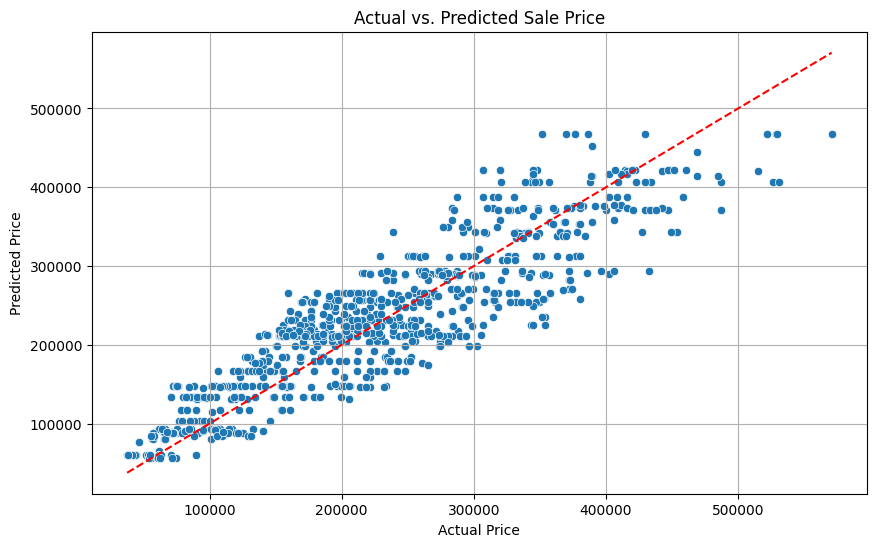

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_tuned)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Sale Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)

Terdapat beberapa outlier yang menyebabkan over/underestimation, namun secara umum prediksi cukup menyebar di sekitar garis ideal.

### **Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target, kita dapat mengeceknya melalui function feature_importances_.

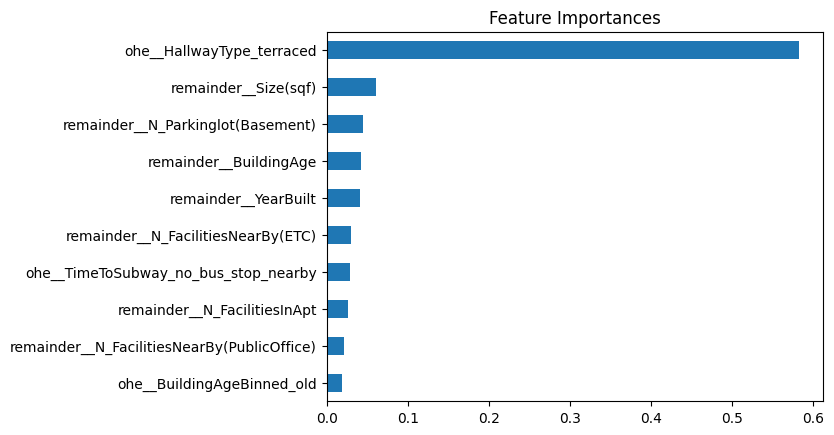

In [156]:
feature_names = best_xgb_model.named_steps['preprocessing'].get_feature_names_out()
importances = best_xgb_model.named_steps['model'].feature_importances_

# Plot feature importances
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.gca().invert_yaxis()

Berdasarkan grafik feature importances, fitur HallwayType_terraced memiliki pengaruh yang paling dominan terhadap prediksi harga apartemen, jauh melebihi fitur-fitur lainnya seperti luas unit dan jumlah tempat parkir basement. Hal ini menunjukkan bahwa tipe lorong (hallway) merupakan faktor kunci dalam penentuan harga pada dataset ini.

---
## **Conclusion & Recommendation**
---

### **Conclusions**

Berdasarkan hasil eksplorasi data, pemodelan, dan evaluasi yang dilakukan, model XGBoost Regressor terbukti memberikan performa terbaik dalam memprediksi harga apartemen di Daegu dibandingkan model-model lain seperti Random Forest, Decision Tree, KNN, dan Linear Regression.

Setelah dilakukan hyperparameter tuning, model XGBoost menghasilkan RMSE sebesar ~47,002, MAE ~38,119, dan MAPE ~19.37% pada data test. Hal ini menunjukkan bahwa model mampu memprediksi harga apartemen dengan tingkat kesalahan rata-rata sekitar 19.37% dari harga aktual.

Selain itu, analisis feature importances mengungkap bahwa fitur ‘HallwayType_terraced’ memiliki pengaruh dominan terhadap prediksi harga apartemen, jauh melampaui fitur-fitur lainnya seperti luas unit (‘Size(sqf)’), jumlah tempat parkir basement, dan usia bangunan.

Meskipun performa model sudah cukup baik, tetap terdapat bias yang perlu diwaspadai, khususnya dari ketidakseimbangan informasi fitur dan potensi outlier dalam target yang belum tercover oleh fitur yang tersedia.


### **Limitations**

Meskipun model XGBoost telah menunjukkan performa yang baik, terdapat beberapa keterbatasan yang perlu diperhatikan:

1. Keterbatasan Fitur
    
    Dataset yang digunakan tidak mencakup beberapa informasi penting yang berpotensi meningkatkan akurasi prediksi harga, seperti jumlah kamar, posisi lantai unit, kondisi interior, atau akses ke fasilitas umum strategis lainnya seperti pusat perbelanjaan, rumah sakit, dan sekolah unggulan.


2. Asumsi Harga Tidak Berubah Seiring Waktu
    
    Model tidak mempertimbangkan aspek waktu secara eksplisit, sehingga diasumsikan bahwa hubungan antar variabel dengan harga bersifat statis. Dalam kenyataannya, harga properti dapat berubah akibat tren pasar, kebijakan pemerintah, atau fluktuasi ekonomi.


3. Potensi Overfitting terhadap Pola Tertentu
    
    Meskipun sudah dilakukan cross-validation dan tuning, model tetap berpotensi overfit terhadap pola yang sangat spesifik dalam data pelatihan, terutama jika terdapat outlier atau data yang tidak representatif.


4. Tidak Memperhitungkan Preferensi Subjektif
    
    Harga apartemen di dunia nyata sangat dipengaruhi oleh preferensi pembeli yang subjektif seperti view, arah mata angin, atau nilai estetika bangunan yang tidak terekam dalam fitur numerik dan kategorikal pada dataset.


5. Generalizability Terbatas
    
    Model dilatih khusus untuk konteks wilayah Daegu, sehingga hasilnya belum tentu dapat diandalkan jika diterapkan langsung di kota lain dengan dinamika dan struktur pasar properti yang berbeda.



### **Recommendations**

Berikut adalah beberapa rekomendasi lanjutan untuk pengembangan dan pemanfaatan model:

1. Lakukan A/B testing terhadap penggunaan model prediktif ini di lingkungan nyata, misalnya dengan membandingkan harga listing yang ditentukan oleh agen manusia versus prediksi model, untuk menilai efektivitas peningkatan transaksi atau akurasi penetapan harga pasar.

2. Analisis kesalahan prediksi lebih lanjut, terutama pada 5% prediksi dengan error tertinggi (baik underestimasi maupun overestimasi). Dari analisis ini, bisa dilakukan investigasi fitur mana yang belum cukup menjelaskan variasi harga.

3. Perluas fitur yang digunakan dengan menambahkan variabel-variabel yang lebih representatif terhadap nilai properti, seperti jumlah kamar, ketersediaan fasilitas (kolam, taman, keamanan), atau jarak ke pusat kota dan pusat ekonomi.

4. Kumpulkan data terbaru dari pasar properti Daegu untuk memastikan model terus relevan dengan dinamika harga dan tren pasar yang berubah. Data baru juga membuka peluang penggunaan model yang lebih kompleks.

5. Eksplorasi model lanjutan, seperti LightGBM, CatBoost, atau bahkan pendekatan deep learning (jika jumlah data memungkinkan), dapat dilakukan untuk menguji apakah kompleksitas model dapat memberikan peningkatan yang signifikan terhadap akurasi.

### **Save Model**

In [157]:
import pickle

# Simpan model akhir (hasil hyperparameter tuning XGBoost) ke dalam file .pkl
with open("xgboost_daegu_apartment_model.pkl", "wb") as f:
    pickle.dump(best_xgb_model, f)

print("Model saved successfully.")

Model saved successfully.
